 ## Statistics_Regression
 
    최초 작성일 : 2020/03/07
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        - 회귀분석
        
        - 회귀분석의 조건 충족 여부

## Regression 

    회귀분석
    - 인과관계
    - 1(독립변수 또는 원인변수):1(종속변수, 결과변수) -> 단일 회귀분석
    - 다:1 -> 다중 회귀분석(회귀분석의 일반적 형태)
    - 조건이 있다
    - 연속변수 and 선형성(직선형태)
    - 정규분포
    - 등분산
    - 다중공선성(독립성) 작아야함
    
    - 일반 선형 모델(Ordinary Linear Model)
    - 일반화 선형 모델(General Linear Model) - 로지스틱 회귀분석

< 출처 >

히승깃▼

https://github.com/slmteruto/academy/blob/master/R_work/StatProject/6_Regression.R

### 예시1. 미국 여성의 키와 몸무게
미국 여성 대상으로 키와 몸무게 조사 (30세~39세) :인치와 파운드

'data.frame':	15 obs. of  2 variables:
 $ height: num  58 59 60 61 62 63 64 65 66 67 ...
 $ weight: num  115 117 120 123 126 129 132 135 139 142 ...


height,weight
58,115
59,117
60,120
61,123
62,126
63,129


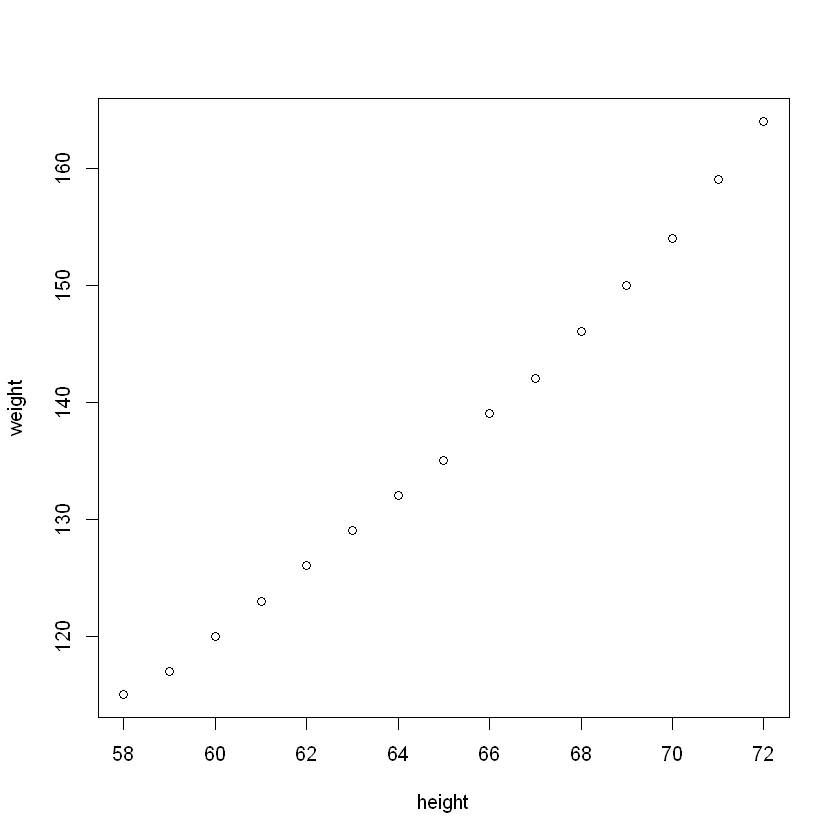

In [15]:
# 데이터 준비

str(women)
head(women)


# 일단 그래프로 데이터 상태 확인해보기
plot(weight ~ height, data=women)
# 옹... 상당히 이쁜 그래프가 나왔어용..

#### 단순 선형회귀
    y = wx + b
    w, b를 찾는게 목적

'data.frame':	15 obs. of  2 variables:
 $ height: num  58 59 60 61 62 63 64 65 66 67 ...
 $ weight: num  115 117 120 123 126 129 132 135 139 142 ...


height,weight
58,115
59,117
60,120
61,123
62,126
63,129



Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14



	Pearson's product-moment correlation

data:  women$weight and women$height
t = 37.855, df = 13, p-value = 1.091e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9860970 0.9985447
sample estimates:
      cor 
0.9954948 


[1] 0.9910099

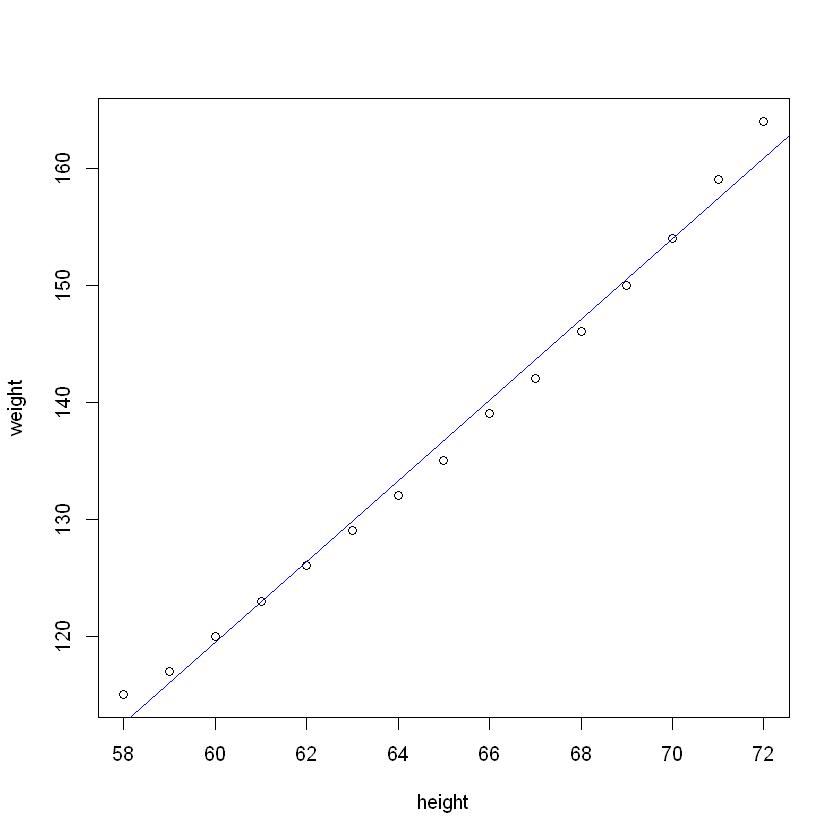

In [7]:
# 그래프 위에 선을 그려주장
# 이 분포를 대표하는 선형모델 짜잔
fit <- lm(weight ~ height, data=women)
summary(fit)
# intercept(y절편) -87.51667
# height(기울기) 3.45
# y = 3.45 * X + (-87.51667)

# call : 사용한식
# Residuals : 실제값과 오차(잔차)
# *** : 강한 관계가 있다는 것을 의미 
# R-squared(결정계수) : 0.991 = 99.1% 키는 몸무게에 엄청난 영향이 있다
# 결정계수(R^2)는 주어진 종속변수와 추정한 종속변수 간의 상관계수의 제곱
# F-statistic : 두 변수는 선형 관계가 있다없다 p-value
# P-value : 1.09e-14 = 키는 몸무게에 대한 절대적인 원인임을 말해준다 


# 위 직선을 그래프 위에 올리장
abline(fit, col="blue")


# 상관관계 파악
cor.test(women$weight, women$height)
# cor = 0.995

# R^2 시키기
0.9954948^2 
# = 0.991
# cor.test를 통해 얻은 cor 값을 제곱 시키면
# summary(fit)에서 얻은 값 Multiple R-squared 0.991 와 동일한 값을 얻을수있음 

#### 다항 회귀 분석(2차원)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


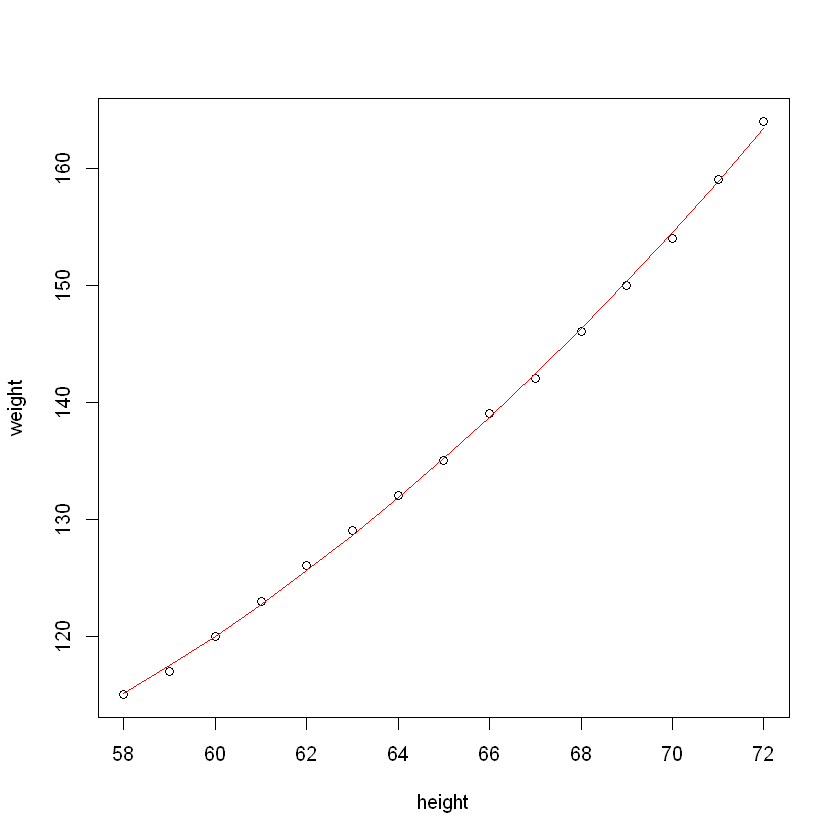

In [10]:
# 직선을 곡선화 시켜서 잔차의 값 줄여보기

fit2 <- lm(weight ~ height+I(height^2), data=women)
# 수식이 하나 더 추가된 것
# I() : 항을 추가하는 함수
# height^2 를 넣어서 2차함수로 만든 것
summary(fit2)
# 위에 직선일때는 0.991
# 곡선일때는 Multiple R-squared: 0.9995 로 상승


# 2차원 선을 올린 그래프를 그려보장
plot(weight ~ height, data=women)
lines(women$height, fitted(fit2), col="red")
# lines() 곡선 그리는 함수
# 오.. 직선보다 오차값이 적은 형태임을 볼 수 있다

#### 다항 회귀 분석(3차원)


Call:
lm(formula = weight ~ height + I(height^2) + I(height^3), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40677 -0.17391  0.03091  0.12051  0.42191 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -8.967e+02  2.946e+02  -3.044  0.01116 * 
height       4.641e+01  1.366e+01   3.399  0.00594 **
I(height^2) -7.462e-01  2.105e-01  -3.544  0.00460 **
I(height^3)  4.253e-03  1.079e-03   3.940  0.00231 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2583 on 11 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic: 1.679e+04 on 3 and 11 DF,  p-value: < 2.2e-16


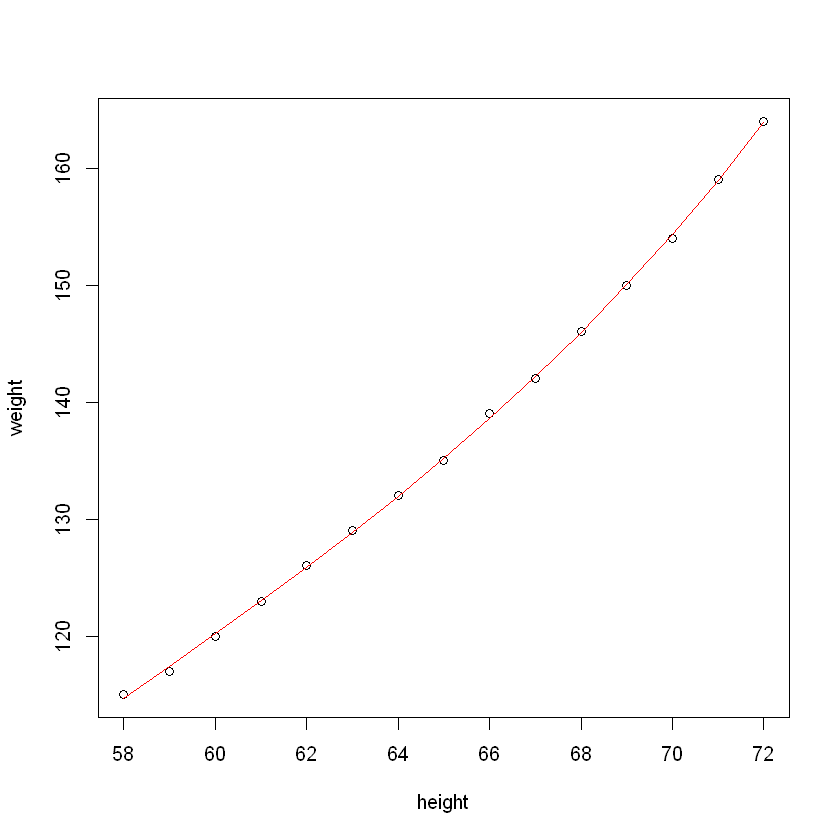

In [19]:
# 3차원 선 그려보자
fit3 <- lm(weight ~ height + I(height^2) + I(height^3), data=women)
summary(fit3)
# Multiple R-squared : 0.9998 로 2차원 보다 더 좋아짐

# 3차원 선을 올린 그래프를 그려보장
plot(weight ~ height, data=women)
lines(women$height, fitted(fit3), col="red")
# 오... 엄청나게 잘맞아

### 회귀 분석의 조건 충족

#### Residuals vs Fitted
    : X축 -> 선형 회귀로 예측된 Y값
    : Y축 -> 잔차
    : 선형회귀에서 오차는 평균이 0이고 분산이 일정한 정규 분포를 가정
      예측된 Y값과 무관하게 잔차의 평균은 0이고 분산은 일정해야함
      따라서, 이 그래프에서 기울기 0인 직선이 관측되는 것이 이상적

#### Nomal Q-Q (R책 p.341)
    : 잔차가 정규 분포를 따르는지 확인하기 위한 Q-Q도
    : 정규분포가 되려면 선을 따라 데이터가 모여있어야 한다 
    
#### Scale-Location
    : X축 -> 선형 회귀로 예측된 Y값
    : Y축 -> 표준화 잔차(Standardized Residual)
    : 등분산, 현재 그래프가 등분산을 이루는지에 대한 여부 알려줌
    : 기울기가 0인 직선이 이상적
    : 만약 특정 위치에서 0에서 멀리 떨어진 값이 관찰된다면 해당 점에 대해 표준화 잔차가 크다
      즉, 회귀 직선이 해당 Y를 잘 적합하지 못한다는 의미
      이런 점들은 이상치(outlier)일 가능성이 있다

#### Residuals vs Leverage
    : X축 -> Leverage(설명 변수가 얼마나 극단에 치우쳐 있는지 뜻함)
             : 예를들어, 다른 데이터의 X값은 모드 1-10 사이의 값인데
               특정 데이터만 9999 값이라면 해당 데이터의 레버리지는 큰 값이 됨
             : 이런 데이터는 입력이 잘못되었거나, 
               해당 범위의 설명 변숫값을 가지는 데이터를 보충해야 하는 작업 등이 필요
    : Y축 -> 표준화 잔차
    : 이상치 확인하는 그래프
    : Cook's Distance (빨간색 dash line)
        : 거리 계산하여 현재 주어진 데이터로부터 얼마나 멀리 떨어져있는지 알려줌
        : 회귀 직선의 모양(기울기나 절편 등)에 크게 영향을 끼치는 점들 찾음
        : 쿡의 거리는 레버리지와 잔차에 비례하므로 두 값이 큰 우측상단과 우측 하단에 쿡의 거리가 큰 값들이 위치하게 됨
                      
                      
    -> 위 조건들을 가지고 회귀분석의 조건들 알아보자

< 출처 >

https://thebook.io/006723/ch08/02/06/

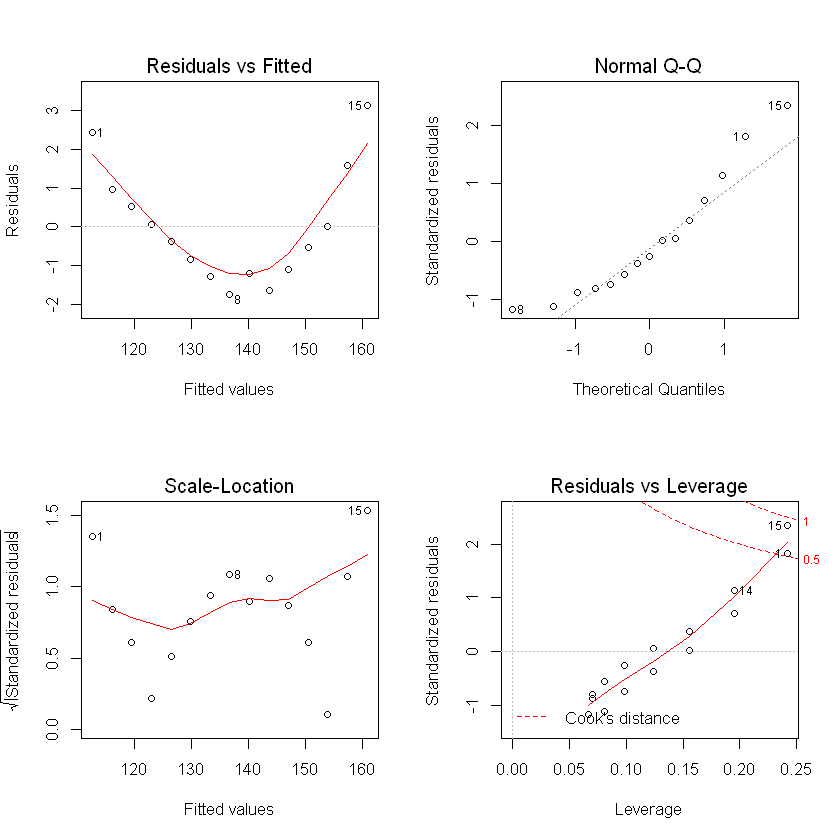

In [16]:
# 단순 선형 회귀

par(mfrow=c(2, 2)) # 2*2 형태로 한번에 보이게 하기
plot(fit) # 그래프 그리기

# Residuals vs Fitted
# : V 형태의 모양을 갖음 -> 선형성 만족X

# Normal Q-Q
# : 오른쪽으로 갈 수록 데이터가 선을 따라가지 않음 -> 정규분포X

# Scale-Location
# : 모양을 가지면 안되는데.. 약간 가진것같음.. -> 등분산 좀 아님

# Residuals vs Leverage
# : 우측 상단에 이상치가 좀 있네..ㅎ

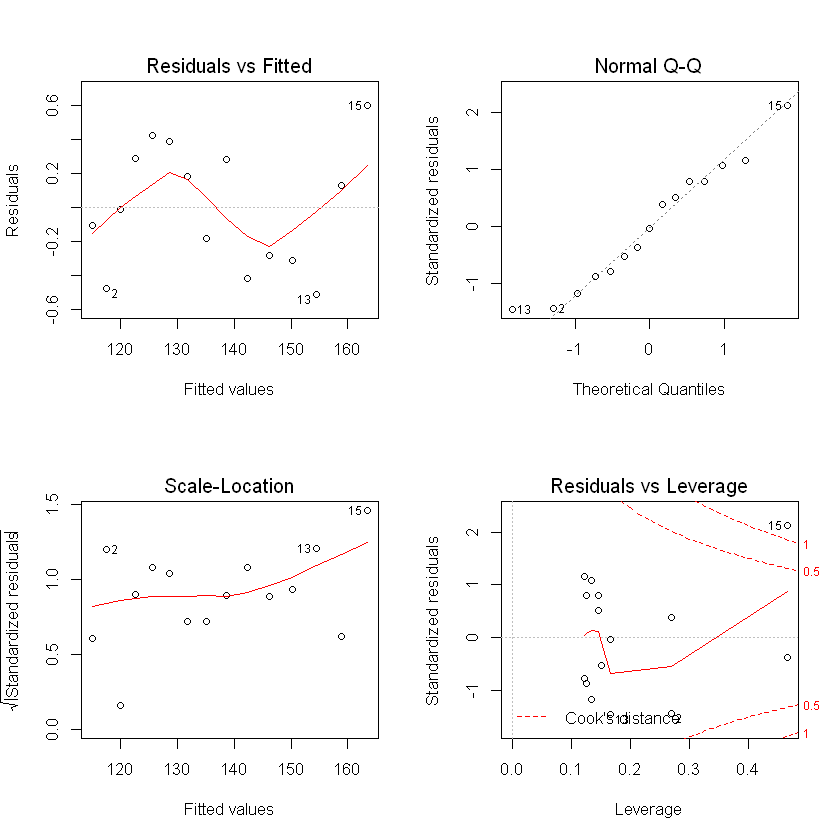

In [17]:
# 다항 회귀 분석(2차원)

par(mfrow=c(2, 2)) # 2*2 형태로 한번에 보이게 하기
plot(fit2) # 그래프 그리기

# Residuals vs Fitted
# : 엄청난 모양을 갖음 -> 선형성 만족X

# Normal Q-Q
# : 오른쪽으로 갈 수록 데이터가 선을 나름 잘 따라감 -> 정규분포 맞는것같은데?

# Scale-Location
# : 약간 0인것같으면서도 모양갖음 -> 등분산 좀 아님

# Residuals vs Leverage
# : 우측 상단에 이상치가 좀 있네..ㅎ

# -> 주어진 데이터 최적화 시키는데는 다항식이 좋음을 알 수 있다
#    But, 계산과 예측이 복잡해질수있음
#    너무 이 데이터에 맞추면 과적합됨
#    오차 허용범위를 넓히는게 정확할 수 도 있음

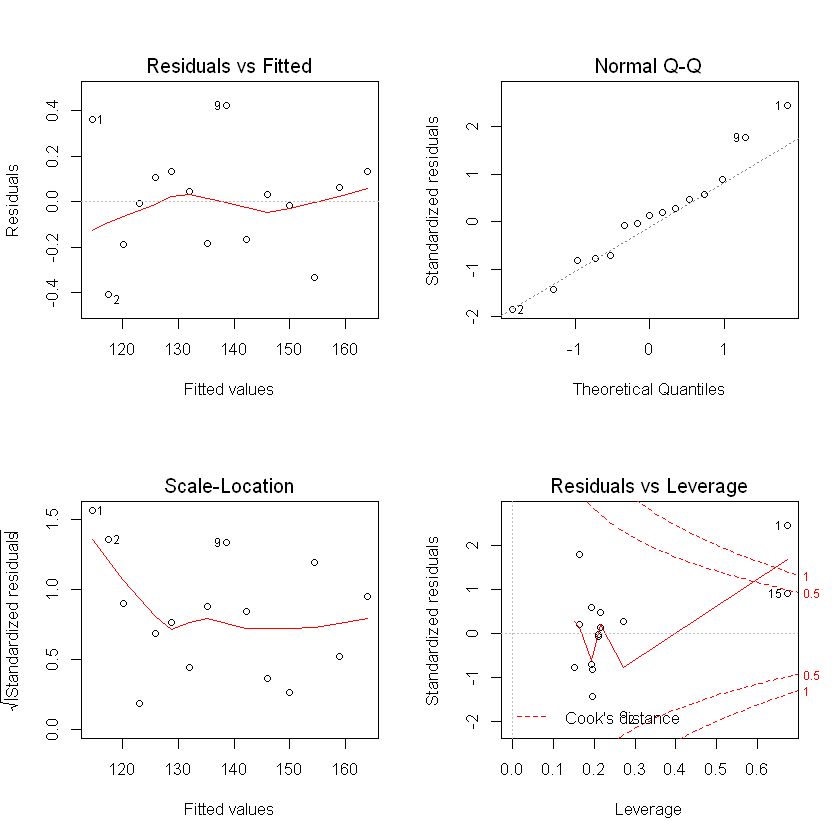

In [20]:
# 다항 회귀 분석(3차원)

par(mfrow=c(2, 2)) # 2*2 형태로 한번에 보이게 하기
plot(fit3) # 그래프 그리기

# Residuals vs Fitted
# : fit2보단 흩어져있고, 선이 0에 가까워져 가는 것 같다

# Normal Q-Q
# : fit2보다 상태 안좋음..

# Scale-Location
# : 열심히 흩어져있긴하다..

# Residuals vs Leverage
# : 우측 상단에 이상치가 좀 있네..ㅎ

# -> 주어진 데이터 최적화 시키는데는 다항식이 좋음을 알 수 있다
#    But, 계산과 예측이 복잡해질수있음
#    너무 이 데이터에 맞추면 과적합됨
#    오차 허용범위를 넓히는게 정확할 수 도 있음

### 예시2. 유치원 여부에 따른 출산율 알아보기
유치원이 많은 지역에 합계 출산율이 높은가? 합계 출산율이 유치원수에 영향을 받는가?

In [21]:
# 데이터 준비

mydata <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/regression.csv")
str(mydata) # 11개의 변수 152개 데이터
head(mydata)

'data.frame':	152 obs. of  11 variables:
 $ 군별           : Factor w/ 152 levels "강원 강릉시",..: 31 30 43 35 29 22 46 28 33 20 ...
 $ dummy          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ birth_rate     : num  1.29 1.16 1.1 1.18 1.07 ...
 $ cultural_center: num  2.79 2.16 1.38 2.34 2.94 2.32 2.61 4.08 3.44 3.02 ...
 $ social_welfare : num  6.9 6.16 18.56 5.33 13.79 ...
 $ active_firms   : num  57.2 62.4 57.7 74.1 69.1 ...
 $ pop            : int  1194041 974580 438457 597414 851380 339484 470832 98277 689859 1039684 ...
 $ urban_park     : num  12.34 18.31 8.15 13.48 7.52 ...
 $ doctors        : num  2.74 3.72 2.43 2.57 2.68 1.93 1.65 1.76 2.2 2.83 ...
 $ tris           : num  3.77 4.16 3.22 4.02 8.8 ...
 $ kindergarten   : num  1.6 1.28 1.46 1.44 1.45 ...


군별,dummy,birth_rate,cultural_center,social_welfare,active_firms,pop,urban_park,doctors,tris,kindergarten
경기 수원시,1,1.292,2.79,6.90,57.18,1194041,12.34,2.74,3.769,1.600
경기 성남시,1,1.159,2.16,6.16,62.43,974580,18.31,3.72,4.156,1.283
경기 의정부시,1,1.104,1.38,18.56,57.74,438457,8.15,2.43,3.216,1.460
경기 안양시,1,1.177,2.34,5.33,74.08,597414,13.48,2.57,4.017,1.440
경기 부천시,1,1.072,2.94,13.79,69.13,851380,7.52,2.68,8.797,1.445
경기 광명시,1,1.235,2.32,4.59,52.85,339484,10.30,1.93,2.268,1.502


In [26]:
# 그래프 그리기 

## 종속변수 (매번쓰기 귀찮으니까 그냥 변수로 묶어주자)
y = cbind(mydata$birth_rate)

## 독립변수 (매번쓰기 귀찮으니까 그냥 변수로 묶어주자)
x = cbind(mydata$kindergarten)

## 선 알아보자
fit <- lm(y~x, data=mydata)
summary(fit)
# y절편 : 1.29049
# 기울기 : 0.04684
# Multiple R-squared : 0.03945 -> 3%로 관계가 거의 없음을 의미
#                                 근데 낮다고 관계없네 라고 치부할건 아니다. 가끔 관계있는데도 낮게 나올 때가 있다
# F-statistic : 6.161 
#               모형적합도, 여러가지 점수를 종합도로 봤을 때 평가값
# p-value : 0.01416
#           0.05 이상이면 귀무가설, 적합함


Call:
lm(formula = y ~ x, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50276 -0.15296 -0.04753  0.12635  1.03009 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.29049    0.05799  22.253   <2e-16 ***
x            0.04684    0.01887   2.482   0.0142 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2394 on 150 degrees of freedom
Multiple R-squared:  0.03945,	Adjusted R-squared:  0.03305 
F-statistic: 6.161 on 1 and 150 DF,  p-value: 0.01416


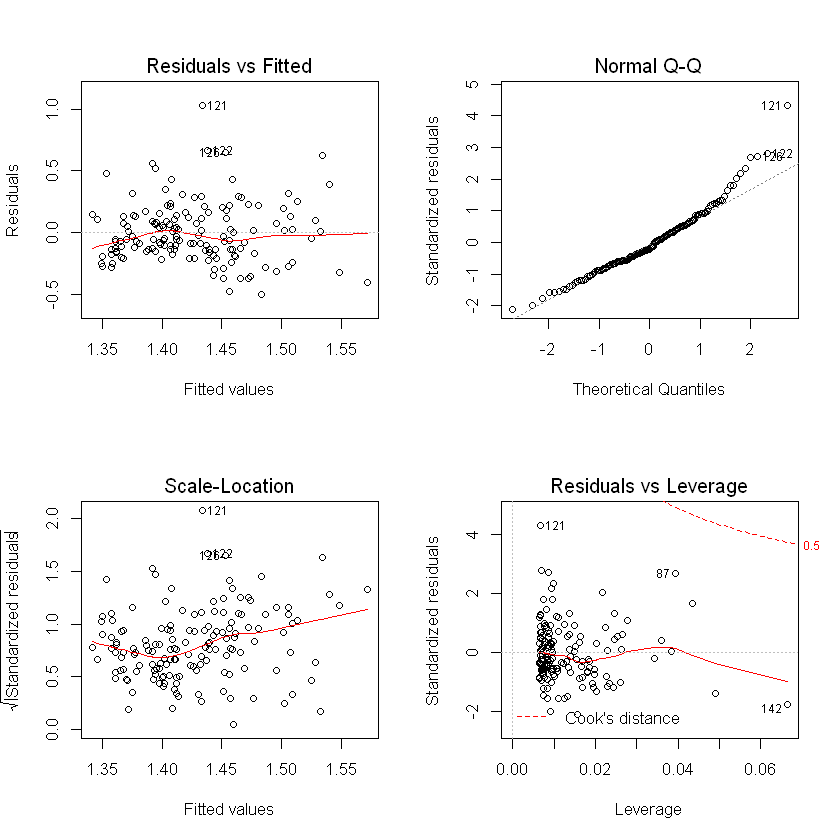

In [27]:
## 그래프를 통해 회귀분석 조건 충족시키는지 알아보기

par(mfrow=c(2, 2)) # 2*2 형태로 한번에 보이게 하기
plot(fit) # 그래프 그리기

# Residuals vs Fitted : 선형성 만족

# Nomal Q-Q : 위쪽.. 선에 데이터가 모여있음, 안좋음 

# Scale-Location : 괜찮음

# Residuals vs Leverage : 이상치도 오케이

# -> 정규분포만 문제임... 보정을 해보자
#    x, y축에 어떤 계산식을 입력해야 transformation이 적절하게 이루어질지 알아야한다
# x값이든 y값이든 한쪽을 증가시켜서 그래프이동으로 정규분포를 맞춰준다. (transformation)
# x 또는 y를 얼마를 계산해줘야 바뀔지 


Call:
lm(formula = log(y) ~ log(x), data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39982 -0.10085 -0.01672  0.10098  0.54916 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.24960    0.03735   6.682 4.32e-10 ***
log(x)       0.09206    0.03511   2.622  0.00964 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1593 on 150 degrees of freedom
Multiple R-squared:  0.04382,	Adjusted R-squared:  0.03745 
F-statistic: 6.875 on 1 and 150 DF,  p-value: 0.009645


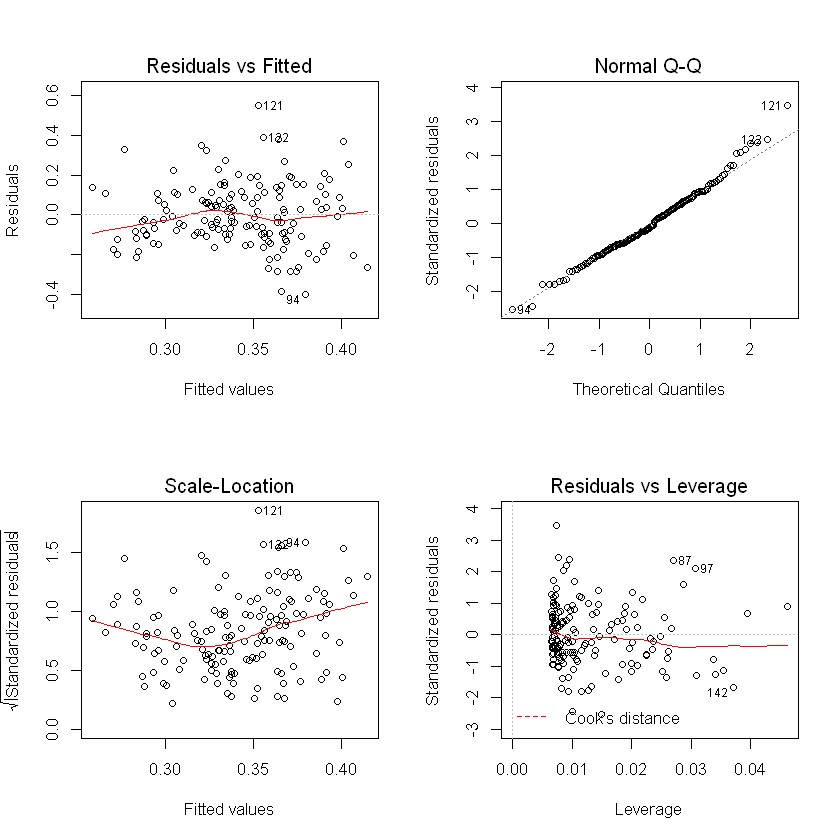

In [29]:
## Normal Q-Q가 이상하니 x, y에 log를 취해보자
# 일반적으로 제곱 -2승을 하던지, 2승을 하던지 등등

fit2 <- lm(log(y) ~ log(x), data=mydata)
summary(fit2)
# *의 개수가 2개로 늘어남
# Multiple R-squared:  0.04382 1% 증가함


## 그래프를 통해 회귀분석 조건 충족시키는지 알아보기

par(mfrow=c(2, 2)) 
plot(fit2) 
# Normal Q-Q : fit보다 더 나아짐

In [30]:
## shapiro.test로 정규분포 여부 정확하게 확인해보기

shapiro.test(resid(fit))
# p-value = 8.088e-05
# 0.05보다 작으므로 정규분포가 아니다

shapiro.test(resid(fit2))
# p-value=0.2227
# 0.05보다 크므로 정규분포다

# -> 수학적 보정을 통하여 적절한 transformation이 이루어지도록 해야한다


	Shapiro-Wilk normality test

data:  resid(fit)
W = 0.95518, p-value = 8.088e-05



	Shapiro-Wilk normality test

data:  resid(fit2)
W = 0.98811, p-value = 0.2227


### 다중 회귀 분석
여러개의 변수 쓰는 것

y = a1x1 + a2x2 + a3x3 + .... + b

### 예시1. Murder
어떤 변수가 murder(종속변수)에 영향을 미치는지 알아보는 데이터 

In [31]:
# 데이터 준비

str(state.x77)
head(state.x77)

 num [1:50, 1:8] 3615 365 2212 2110 21198 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
  ..$ : chr [1:8] "Population" "Income" "Illiteracy" "Life Exp" ...


,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766


In [35]:
# matrix -> dataframe 형태로 바꿔주기

states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
str(states)
head(states)

'data.frame':	50 obs. of  5 variables:
 $ Murder    : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ Population: num  3615 365 2212 2110 21198 ...
 $ Illiteracy: num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Income    : num  3624 6315 4530 3378 5114 ...
 $ Frost     : num  20 152 15 65 20 166 139 103 11 60 ...


,Murder,Population,Illiteracy,Income,Frost
Alabama,15.1,3615,2.1,3624,20
Alaska,11.3,365,1.5,6315,152
Arizona,7.8,2212,1.8,4530,15
Arkansas,10.1,2110,1.9,3378,65
California,10.3,21198,1.1,5114,20
Colorado,6.8,2541,0.7,4884,166


In [36]:
# 원인 변수 : 살인사건에 영향을 주는 변수들

# fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)

# 종속변수를 제외한 나머지 변수를 다 넣고싶으면 .만 찍으면 된다
fit <- lm(Murder ~ ., data=states)
summary(fit)

# P값 : 0.05 보다 작으면 Murder과 관계 있음 / 0.05 보다 크면 Murder과 관계 없음
# 0.05 보다 큰 변수 : Population *, Illiteracy 2.19e-05 ***
# 0.05 보다 작은 변수 : Income , Frost 

# 컬럼들 서로 독립적이여야한다. 서로 관계있으면 분석의 방해요소가 된다. 
# 이런건 걸러낼줄알아야한다.. -> 다중공선성

# 다중 공선성(Multicolinearity)
# : 독립변수들끼리 관계가 있는지 없는지 알아보는 것

# VIF(Variation Inflation Factor)
# : 분산 팽창 지수 (다중 공선성을 측정하는 지수) 
# : vit는 루트를 많이 씌워서 계산한다
#   vif에 루트를 씌웠을때 2보다 크면 다중 공선성 문제가 있다고 판단


Call:
lm(formula = Murder ~ ., data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


In [40]:
# vif 가져오장
# install.packages("car")
# library(car)

# 다중 공선성 알아보기

sqrt(vif(fit))
# 그 어떤것도 2보다 작은 값을 갖기에
# 다중 공선성에 문제가 없다

Population Illiteracy     Income      Frost 
  1.115922   1.471682   1.160096   1.443103

In [ ]:
### 이상치
# 이상치(outlier) : 표준잔차 2배이상 크거나 작은값 
# 유의수준 95%, 정규분포 버리는 구간이 -1.96, +1.96 이라서 2배라는 값이...음..나온다..
# 큰 지레점(high leverage points) : 절편을 포함한 인수들의 숫자/n의 값이 2 ~ 3배이상 되는 관측치 
#   현재 car 예제의 경우 : 5(독립변수 4개 + 절편 b = 5)/50 = 0.1
# 영향 관측치(Cook's D) : '독립변수의 수/(샘플수 - 독립변수의 수 - 1)' 의 값보다 큰 값 
#   현재 car 예제의 경우 : 독립변수의 수 4개, 샘플수 50개
#                        : 4/(50 - 4 -1) = 0.1




# 그다음 살펴봐야할게 이상치이다. 
# 이상하다고 무조건 빼면 안된다. 주요한 값이 이상치로 인식될 수 있기 때문이다. 

# 이상치 종류
# - 일반이상치 : 표준편차 2배이상 크거나 작은값 

# - 큰 지레점(high leverage points) : (절편을 포함한 인수들의 숫자 / 전체 개수) 이 값이 2~3배 이상 되는 관측치
#    그래서 states에서 쓴 데이터에서는 분모는 총 50개, 분자는 인자4개(인구,빙결, 수입, 병?)+절편(Murder)1개 총 5개그래서 5/50
#    0.1이다. 

# - 영향 관측치(Cook's Distance) : (독립변수의 수/ (샘플수-독립변수개수-1)) 의 값보다 큰 값들이 이상치가 된다. 
#   4/(50-4-1) = 0.1정도 나온다. 이 값보다 큰 값들은 이상치 

# 모든 데이터를 비교해서 찾아야할순 없잖아요. 
# 다행히 동시에 시각적으로 보여주는 그래프가 있다. 